#Why Regularization is Important?

+ Important from Interview point of view (Bias/Variance Tradeoff)
+ It can be applied to all the ML & DL algorithms

#Hidden Truth

+ Lets assume we have a dataset with CGPA, IQ & we have to predict LPA

+ Our job is to find a find a mathematical relationship b/w x & y --> y = f(X) which will work on always

+ Data we're using to find the mathematical relationship is sample data & we're trying to predict population data lpa using sample data

+ so no matter what how accurate our ml model is.. there will always be some noise in the data, we can never do perfect prediction

+ y = f(X) + irreducible error

+ y = f(X) is when we have population data.. but since we only have sample data so we found y^ = f-dash(X)

+ the difference b/w y & y^ is reducible error

+ we might be able to reduce this error if we get some more data or apply any other algorithm

+ So, error present in model can be of 2 types:
  1. irreducible: naturally present in data so cant be removed
  2. reducible: could be removed


+ "bias-variance tradeoff" is closely related to reducible error

+ reducible error = (bias)^2 + variance

#Bias-Variance Tradeoff

+ mostly in machine learning the flow is that we have sample data & predict for population data

+ lets assume we have population data, y = f(X) = x^2 (range = -15,10), graph of model will look like this:

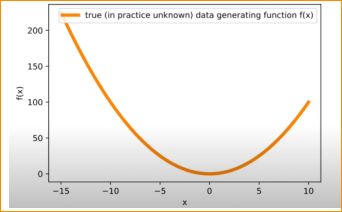

+ now lets add some random error, 1000 random error points added in the graph

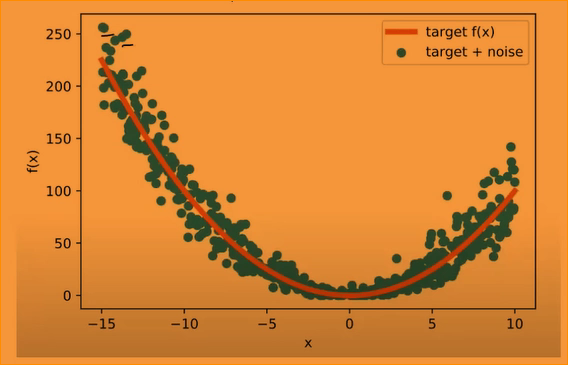

+ now above with random error points is the population data

+ true function of above with error is y = f(X) + error where f(X) = x^2

+ lets draw 3 random samples out of population data & make 3 sample data out of population data which we assume we already have

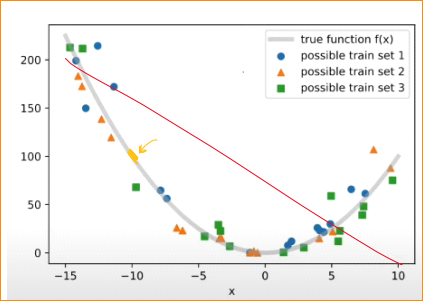

+ now train 3 ml models on those 3 sample data & draw "best fit line"

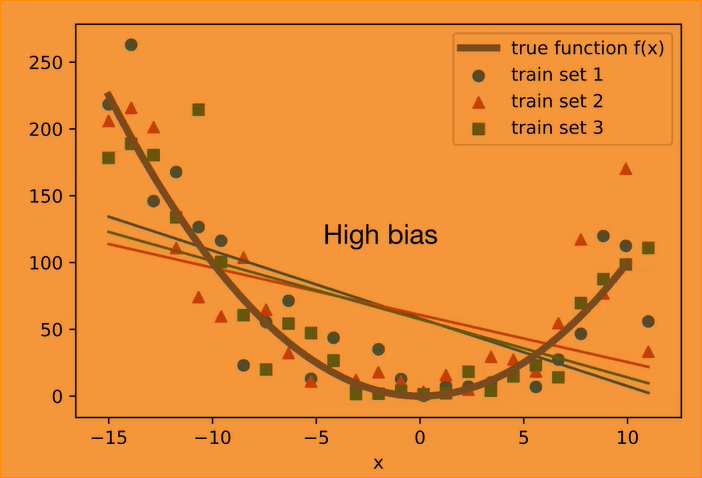

+ above you see 3 linear regression lines which are trying to predict the grey curve which is the population data

+ this is where the oncept of "bias" & "variance" starts

+ "High Bias model" --> Its the inability of ml model to fit training data whereas if ml model is able to fit training data correctly then its called "Low Bias model"

+ above models are "High Bias" bcoz they are'nt able to fit the training data correctly, they are way-off from the actual points on all points except 2 where they are touching the curve

+ At the same time they are also called "Low Variance" models.. variance is how much prediction changes when training data changes, as per the image it shows that prediction lines doesnt change much on different data


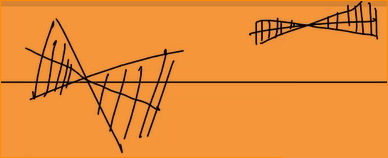


+ now since ml model is not performing good even on training data so we applied polynomial regression which give curvy shape, now it looks like this:

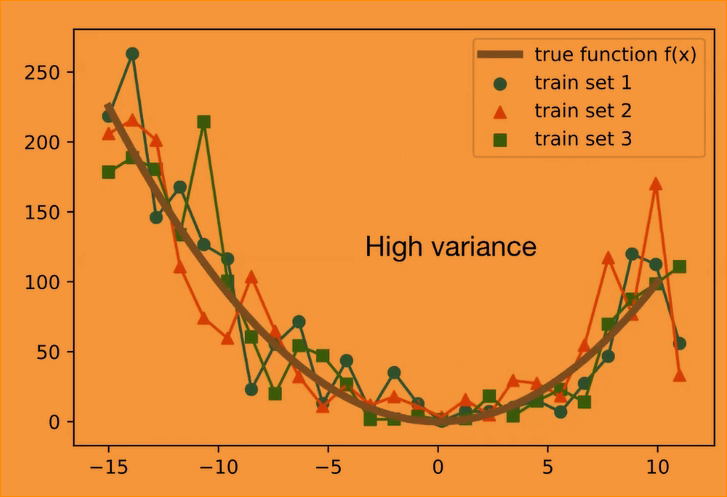

+ It will try to touch every point, fits good on training data, now they are low bias models

+ At the same time, prediction changed for all 3 sample datasets, so they are High variance.

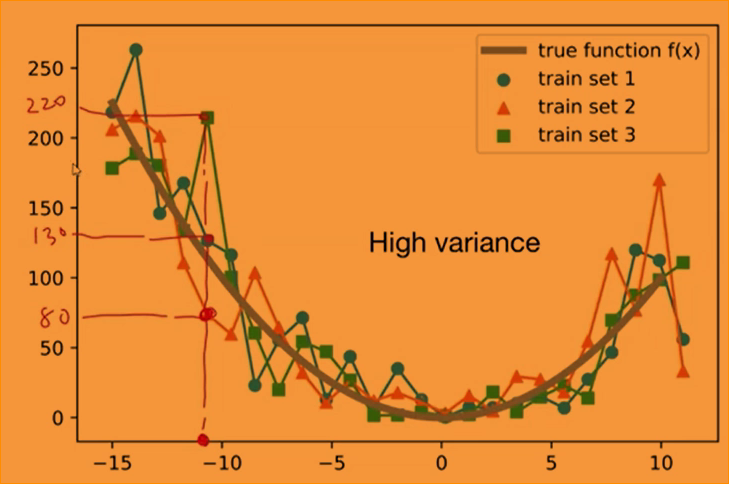


+ which means model is only good on specific trainig data, whenever its given a different data then it perform worst


+ High variance models are generally "Overfitted"

+ whats is overfitting: when model performs good on training data & worst on testing data

+ High bias are generally "Underfitted" becoz they're nt able to give good results even on training data

+ Ideally we need models with "low bias" & "low variance" but this is not possible bcoz when we reduce bias - variance increases and when we reduce variance - bias increases.

+ if we reduce bias then it will try to pass closely to every data point hence variance in prediction b/w different sample data will increase & as we try to reduce variance meaning we have to go far from the actual prediction data point, model will perform bad& will be underfitted hence bias will increase

+ this phenomenon is called **"Bias-Variance"** trade off

+ As a datascientist, we have to find the sweet spot the midline b/w the two or keep complexity  to a level, where both are at thier lowest.



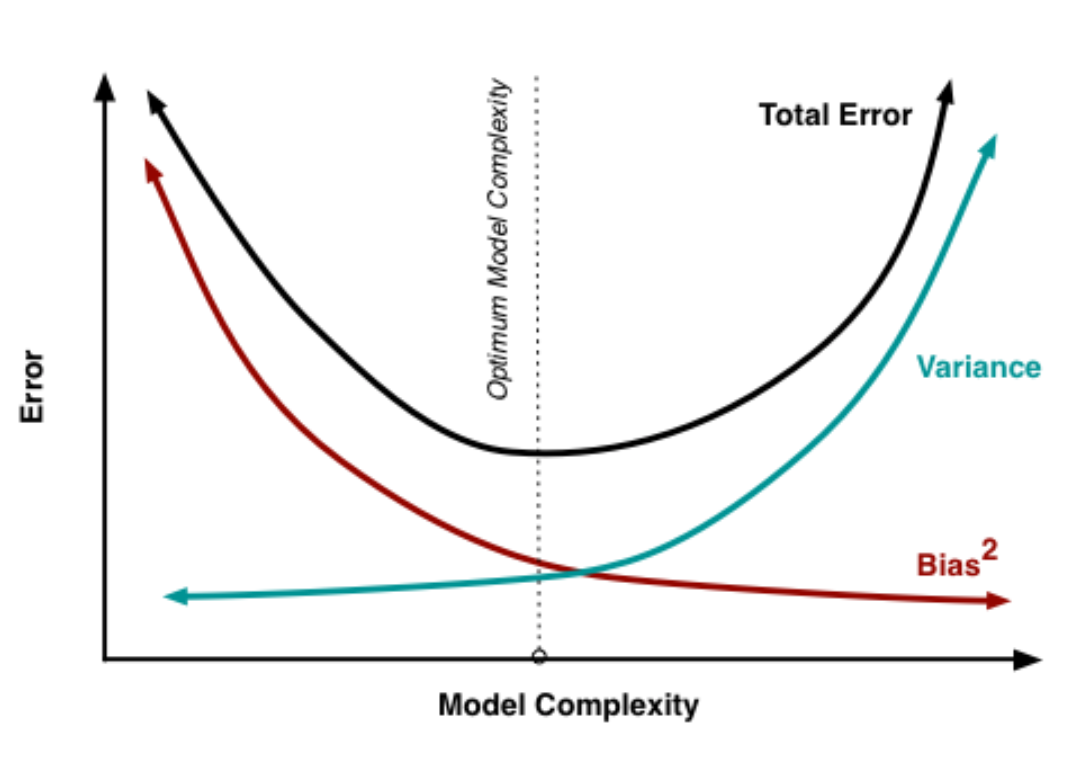

##Mathematics Intuition

###Expected value & variance

+ Its related to probabilty

+ It represents the average outcome of a random variable over a large number of trial or experiments

+ just like rolling a die 1lac times, probability of getting each number is 1/6 so if we roll the die 1lac times, its expected value will be 3.5

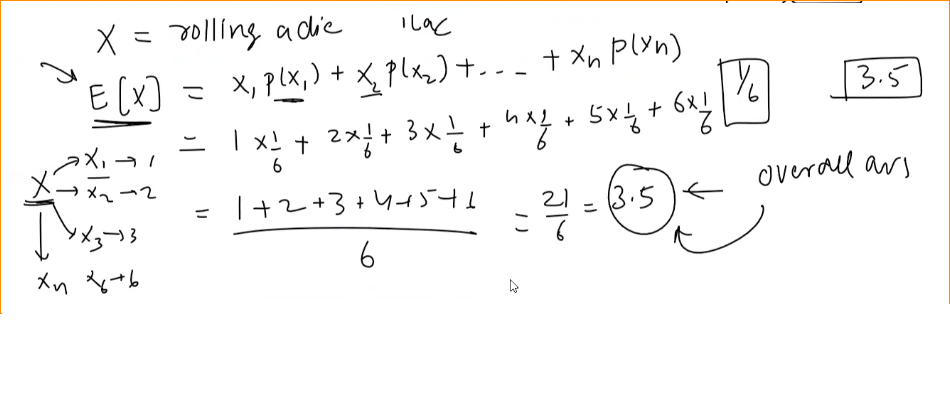


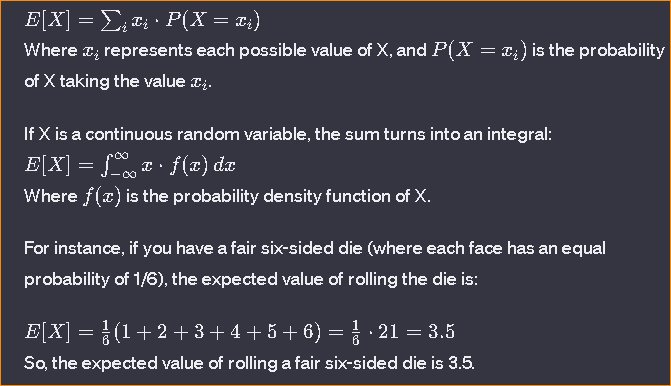

+ So we can say that when we're trying to find a mean, we're trying to estimate population mean

+ Variance of X (variance of population)

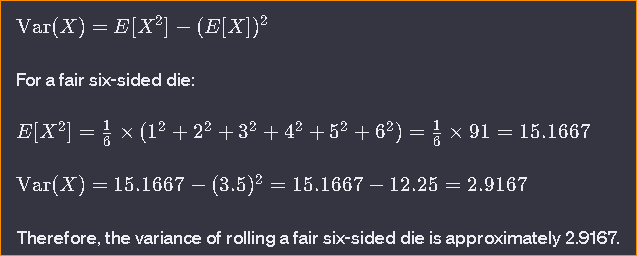

###What are Bias & Variance mathematically?

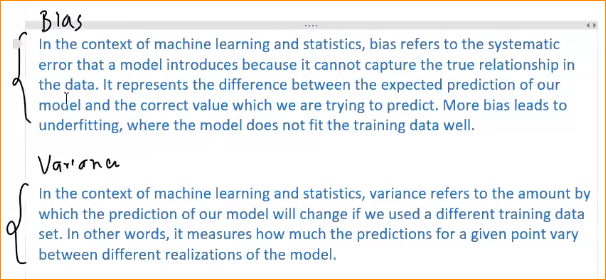

+ lets take an example that we know the true regression line of a nodel

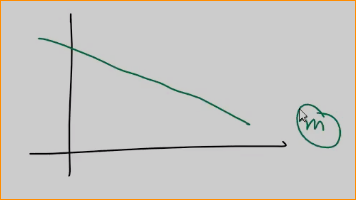

+ we train multiple models on different sample data

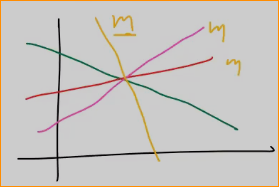

+ when we take the mean of "slope" of all the trained models E[m], it comes out to be equal to true m

+ E[m] - m = 0, bias = 0, this tye of models are called unbiased model

+ we never know f(x).. we only f'(x), below is just a mathematical representation:

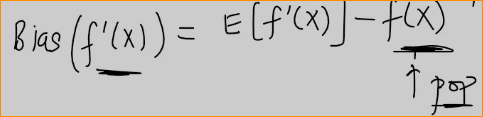


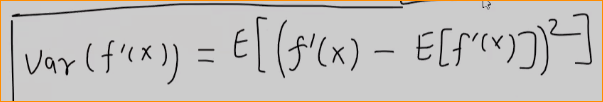





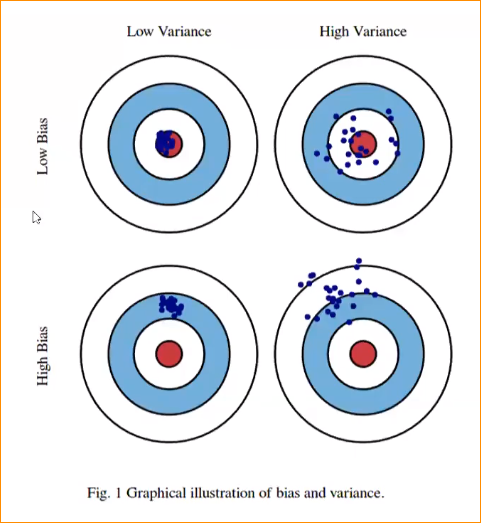

#Bias-Variance Decomposition

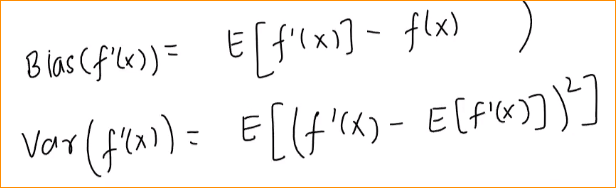


+ Formula to calculate Bias & Variance of a model

+ Every ML Model has a Loss, In Linear regression loss is MSE
+ Bias Variance Decomposition divides Loss into 3 parts
+ Bias + Variance + Irreducible error & the equation will be:
+ (Bias^2 + Variance) + Var(E)
+   reducible error      irreducible error

*---------------------------------------------------------------------------*
+ **In General, Any ML model will have a Loss**
+ which can be decomposed into 3 parts
+ Bias(distance b/w your prediction from actual)
+ Variance(distance b/w your multiple predictions)
+ Irreducibile error (noise in data)
+ In order to reduce the Bias.. we use different algorithms like Polynomial regression etc but it increases variance due to bias variance trade off so to reduce variance we use regularization
+ To Reduce underfitting(bias) we use good algorithms
+ To Reduce overfitting(variance) we use regularization

##Derivation of Bias-Variance Decomposition

In [ ]:
# skipped

##Code Implimentation

In [ ]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from mlxtend.data import boston_housing_data
from sklearn.model_selection import train_test_split


X, y = boston_housing_data()
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True)

In [ ]:
#linear regression has high bias & low variance
lr = LinearRegression()

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        lr, X_train, y_train, X_test, y_test,
        loss='mse',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 29.891
Average bias: 28.609
Average variance: 1.282


In [ ]:
#decision tree has low bias & high variance
dt = DecisionTreeRegressor(random_state=123)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        dt, X_train, y_train, X_test, y_test,
        loss='mse',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 31.536
Average bias: 14.096
Average variance: 17.440


#What is Regularization?

+ Its a technique used to reduce overfitting (variance) in complex ML models
+ Its not specific to 1 ML algorithm, It can be implimented on various algorithms

**Types of Regularization**
+ Ridge
+ Lasso
+ ElasticNet

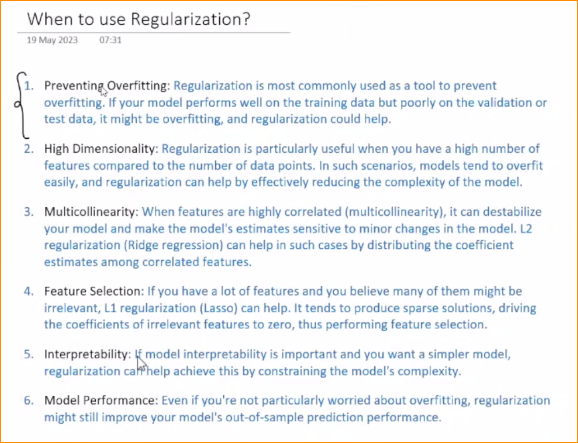

+ Always apply Regularization, There is no harm alongside Linear Regression

#Ridge Regularization (L2)

##Ridge Regression

+ Regularization is a technique used to induce some added information to reduce overfitting

+ Regularize: means increase if something is decreased & vice versa

+ There are 3 regularization techniques availble
  1. Ridge(l2)
  2. Lasso(l1)
  3. Elasticnet

+ Lets understand Overfitting:
  - When model performs well on training & worst on testing data
  - Variance is high means results are different when data changes
  - In linear regression we find the best fit line: y = mx + b
  - How to find overfitting in a model? by finding the value of m
  - m is the weightage, how much the value of y will change if we change the value of m
  - any overfitted model will have higher "m"
  - so if a model is overfitted it means value of m is high & if the value of m is less then it is underfitted
  - if we start to decrease the value of m & eventually reach 0 then it means in order to calculate y, we dont need m

  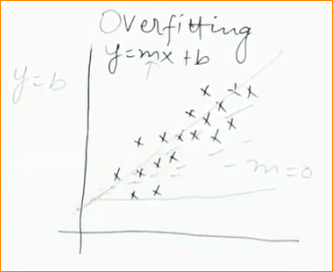  
  
  - Or if we start to increase the slope which eventually becomes parallel to y axis & its value will be infinity which means in order to calculate y, x has highest importance

  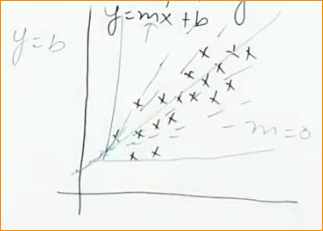

  - In order to reduce overfitting, then we've to reduce the value of m


+ In optimization we try to reduce the "Loss" using 2 techniques:
  OLS & Gradient Descent

+ In Regularization, we add an extra term (added information)  λ*(m)² to the loss function

+ 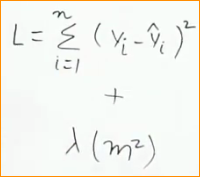

In [1]:
# λ is a hyper parameter which ranges b/w 0 to infinity

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [4]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [7]:
#first we'll train linear regression & then we'll train ridge regression to compare the results

In [5]:
X = data.data
y = data.target

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=45)

In [8]:
from sklearn.linear_model import LinearRegression
L = LinearRegression()

In [9]:
L.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = L.predict(X_test)

In [12]:
from sklearn.metrics import r2_score, mean_squared_error
print("R2 Score: ",r2_score(y_test, y_pred))
print("RMSE: ",mean_squared_error(y_test, y_pred))

R2 Score:  0.5188113124539249
RMSE:  2374.333939618319


In [13]:
#now implimenting ridge regularization
from sklearn.linear_model import Ridge
R = Ridge(alpha=0.0001)

In [15]:
R.fit(X_train, y_train)

Ridge(alpha=0.0001)

In [16]:
y_pred1 = R.predict(X_test)

In [17]:
print("R2 Score: ",r2_score(y_test, y_pred1))
print("RMSE: ",mean_squared_error(y_test, y_pred1))

R2 Score:  0.5189732635884949
RMSE:  2373.534822587263


In [18]:
#we can see a slight improvement in the model, earlier it was 0.5188 & now it is 0.5189

###Maths Intuition

In [19]:
#skipped

##Ridge Regressionn - Gradient Descent

In [1]:
#skipped

##Key Notes from Ridge Regression

+ Ridge regression means to add a term in Loss function which reduces overfitting & coefficient value decreases

+ How coefficients get affected when we increase the value of Lambda(added term): They start to deccrease or shrink.. towards 0 but never become 0

+ Coefficients with higher value shrink faster towards 0

+ For smaller value of lambda Bias will be Higher & Vice versa for Variance

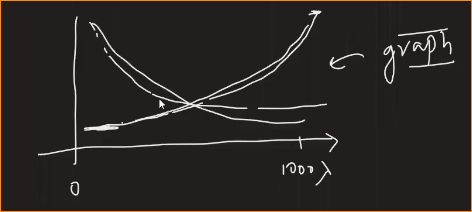

+ Effect of Regularization on Loss function: Loss function shrinks & move up & goes towards 0

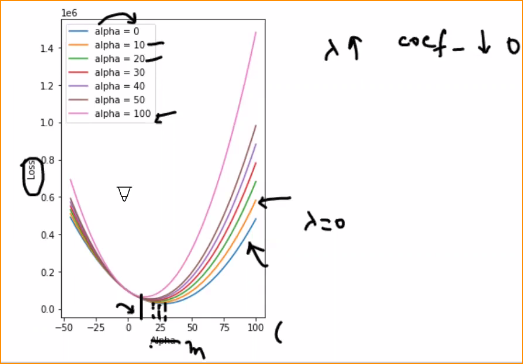




#Lasso Regularization (l1)

+ In Ridge we added a aditional term "lambda" to reduce overfitting, when we increase the value of lambda then coefficients value will gradually move towards 0 but it never becomes 0

+ In Lasso also we add additional term.. in ridge it was suqred terms thats it is called L2 & in lasso we add absolute terms which is mod instead of square, everything else remain same

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

[29.11519601]
-1.8317362902093706


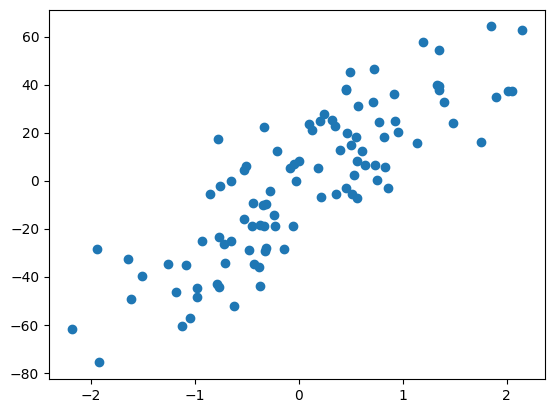

In [2]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.coef_)
print(reg.intercept_)

<ipython-input-3-26f2038c46b4>:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  L.fit(X_train,y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.214e+04, tolerance: 7.678e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


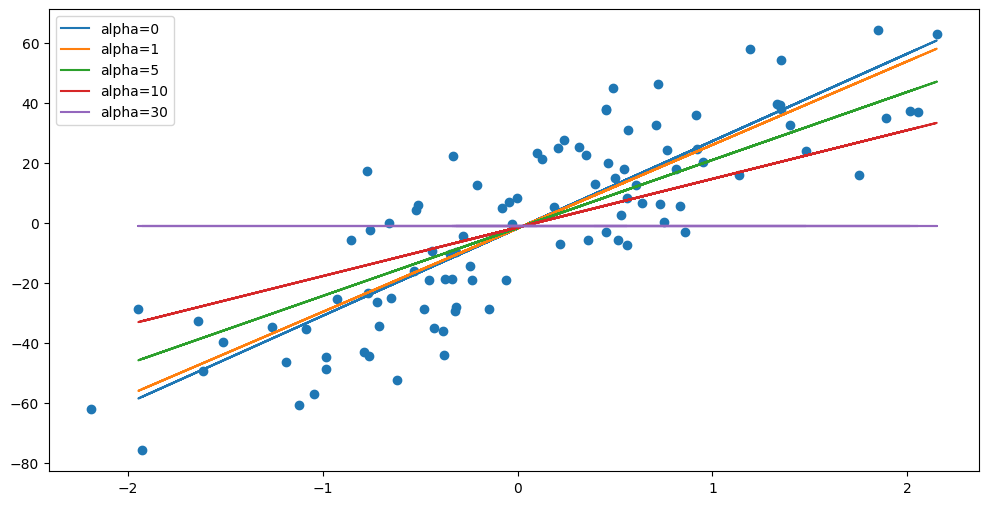

In [3]:
alphas = [0,1,5,10,30]
plt.figure(figsize=(12,6))
plt.scatter(X,y)
for i in alphas:
    L = Lasso(alpha=i)
    L.fit(X_train,y_train)
    plt.plot(X_test,L.predict(X_test),label='alpha={}'.format(i))
plt.legend()
plt.show()

In [8]:
#as we increase the value of lambda, slope decreases as in above picture
#in lasso, coefficients becomes 0 with increase in alpha value

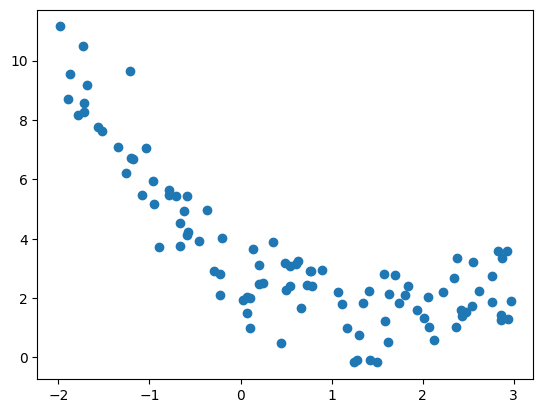

In [6]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.228e+01, tolerance: 6.448e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coor

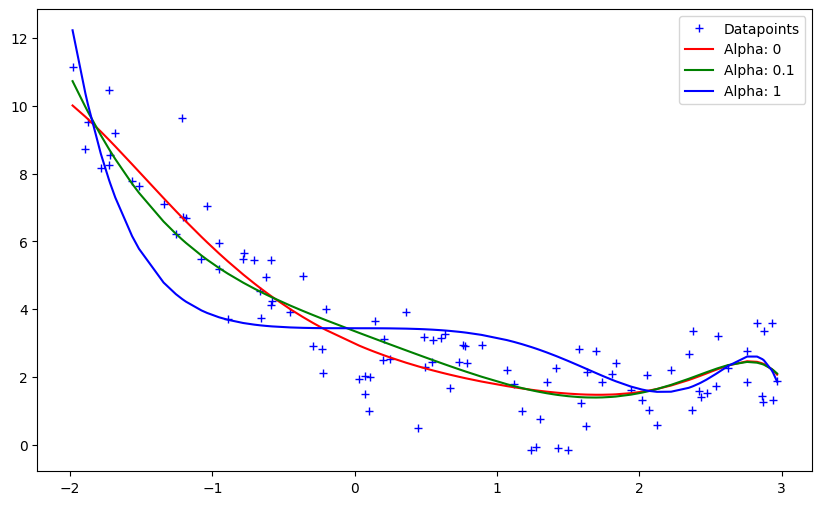

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

def get_preds_lasso(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('lasso', Lasso(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 0.1, 1]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_lasso(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

In [14]:
#when working with high dimensional data, chances of overfitting increases
#if we use ridge regression then thos coefficients will never be 0, they will hold some value
#but in lasso, as we increase the value of lambda less important coefficients become 0 so we can easily neglect them
#and reduce the shape of data so "lasso" also acts as feature selection technique

#higher coefficients are effected more, bcoz coefficinets value is high & to reduce overfitting we need to reduce them faster
#if we increase the value of lambda then eventually they become 0 & then it will be a case of underfitting

#when we increase the value of lambda then overfitting decreases which means bias increases & variance decreases

# effect on loss function: coefficinets becomes zero & not negative

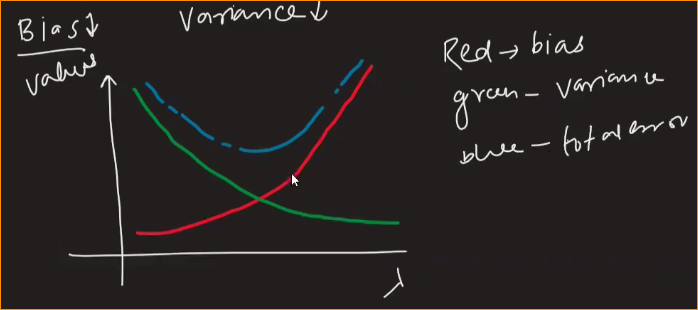

##Why Lasso creates Sparsityt? (few values become 0)

+ why in lasso, coefficinets become 0 when we increase the value of lambda but not in the case of ridge?

+ coefficinets values starts to decrease/shrink as we increase the value of lambda.. & stops at 0 bcoz if we increase the value of lambda further then coefficinets value will start to increase which what we dont want bcoz of change in formula

+ In ridge "lambda" is in denominator so no matter how much we increase the value of lambda it will never reach 0 whereas in lasso.. "lambda" is numerator term which drives it to 0

#ElasticNet Regression

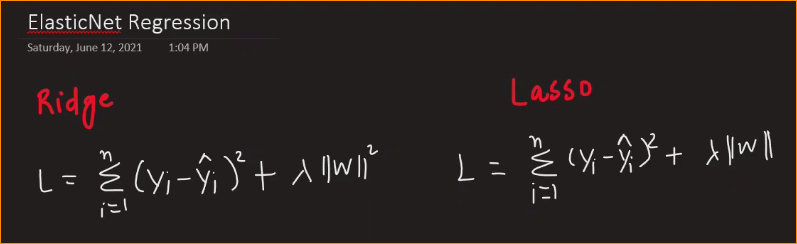

+ We use Ridge when we know that all columns are important
+ We use Lasso when we know that few columns may not be important
+ We use ElasticNet when we aren't sure of which regularization technique to use

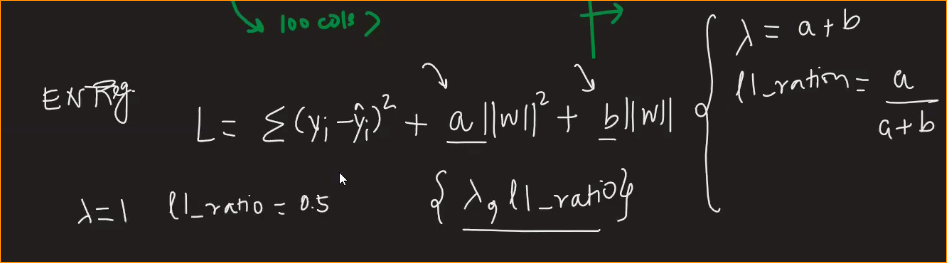

In [1]:
#When your input columns have multi colinearity then elasticnet gives better results

In [2]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [3]:
X,y = load_diabetes(return_X_y=True)

In [5]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 2)

In [6]:
#linear regression
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test, y_pred)

0.4399338661568968

In [7]:
#ridge
reg = Ridge(alpha = 0.1)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test, y_pred)

0.45199494197195456

In [8]:
#lasso
reg = Lasso(alpha = 0.01)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test, y_pred)

0.44111855963110613

In [12]:
#elasticnet
reg = ElasticNet(alpha = 0.005, l1_ratio=0.9)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test, y_pred)

0.4531474541554823

#YT Resources

In [ ]:
https://www.youtube.com/watch?v=3fcKKZMFbyA&t=598s

https://www.youtube.com/watch?v=8Uxxu0-dAKQ

https://www.youtube.com/watch?v=0hiGp3lF6ig

https://www.youtube.com/watch?v=8drEB06QjLs

https://www.youtube.com/watch?v=HVWNRMEH9Ro


#ml
https://www.youtube.com/watch?v=0g-XL0WV2xo